In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
from scipy.misc import derivative
import time

In [2]:
data= pd.read_csv("Eckerle4_Data.txt",names=['y','x'], sep=" ")

data

,y,x
NaN,0.000158,400.0
NaN,0.000170,405.0
NaN,0.000235,410.0
NaN,0.000310,415.0
NaN,0.000492,420.0
NaN,0.000871,425.0
NaN,0.001742,430.0
NaN,0.004640,435.0
NaN,0.006589,436.5
NaN,0.009730,438.0


In [3]:
y = torch.from_numpy(data['y'].to_numpy(np.float64))
x = torch.from_numpy(data['x'].to_numpy(np.float64))

# b = torch.tensor([1.0,10.0,500.0],requires_grad=True)
b = torch.tensor([1.5,5.0,450.0],requires_grad=True)

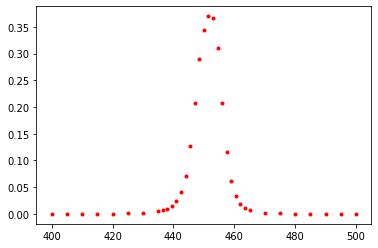

In [4]:
plt.plot(x.numpy(),y.numpy(),"r.")

In [5]:
## Numerical Differentiation

# # b = np.array([1.0,10.0,500.0]).reshape(-1,1)
# b = np.array([1.5,5.0,450.0]).reshape(-1,1)

# x=x.detach().numpy()

# u=0.1 #beta multiply identity matrix
# beta = 10
# V_prev = 0



# def f0(b0):
#     return (b0/b[1]) * np.exp(-0.5*(np.square((x-b[2])/b[1]))) -y.detach().numpy()  
# def f1(b1):
#     return (b[0]/b1) * np.exp(-0.5*(np.square((x-b[2])/b[1]))) -y.detach().numpy()  
# def f2(b2):
#     return (b[0]/b[1]) * np.exp(-0.5*(np.square((x-b2)/b[1])))-y.detach().numpy()  

# for c in range(500):
#     start_time = time.time()
#     y_pred = (b[0]/b[1]) * np.exp(-0.5*(np.square((x-b[2])/b[1])))
#     error = (y_pred - y.detach().numpy()).reshape(-1,1)
    
#     d_b0 = derivative(f0,b[0] , dx=1e-6)
#     d_b1 = derivative(f1,b[1] , dx=1e-6)
#     d_b2 = derivative(f2,b[2] , dx=1e-6)
     
#     jacobian = np.transpose(np.array([d_b0,d_b1,d_b2]))
#     dParam = np.matmul(np.matmul(np.linalg.inv((np.matmul(np.transpose(jacobian),jacobian)+u*np.identity(len(b)))),np.transpose(jacobian)),error)
#     b -= dParam
#     V = np.sum(np.square(error))
#     if(V > V_prev):
#             u *= beta
#     else:
#             u /= beta
#     V_prev = V
#     print("c: ",c," error: ",V," B:", b)
    
#     if V < 1.4635887487E-03:
#         break
# print("time taken to execute: ",time.time()-start_time)  

In [6]:
def Jacobian(loss,params,numParams):
    
    jacobian = torch.empty(len(loss), numParams) 
    
    for i in range(len(loss)):
        
        loss[i].backward(retain_graph=True)
        
        for n in range(numParams):
            jacobian[i][n] = params.grad[n]
        params.grad.zero_()      
    return jacobian    

In [7]:
## Automatic Differentiation
num_param = len(b)
u=0.1 #beta multiply identity matrix
beta = 10
error_prev = 0
for c in range(500):
    start_time = time.time()
    
    y_pred = (b[0]/b[1]) * torch.exp(-0.5*(torch.square((x-b[2])/b[1]))) 
    
    loss = y_pred-y
    error = torch.sum(torch.square(loss)) #residual sum of squares
    print("",c," error is: ",error.detach().numpy()," b is ", b.detach().numpy())
    jacobian = Jacobian(loss,b,len(b))

    dParam = torch.matmul(torch.matmul(torch.inverse(torch.matmul(torch.transpose(jacobian,-1,0),jacobian)+u*torch.eye(num_param, num_param)),torch.transpose(jacobian,-1,0)),loss.float())
    with torch.no_grad():
        b -=dParam
    
        if(error > error_prev):
            u *= beta
        else:
            u /= beta
        error_prev = error
    if error < 1.4635887487E-03:
        break
        
print("time taken to execute: ",time.time()-start_time)
    

 0  error is:  0.05668290402252678  b is  [  1.5   5.  450. ]
 1  error is:  0.042058270080548514  b is  [  1.6024985   4.9260798 450.18976  ]
 2  error is:  0.04083615575596032  b is  [  1.6126949   4.917063  450.2098   ]
 3  error is:  0.032331866827703226  b is  [  1.6354265   4.84698   450.38882  ]
 4  error is:  0.00756513362692207  b is  [  1.6007981   4.519389  451.15436  ]
 5  error is:  0.001510585808181915  b is  [  1.5593071   4.134962  451.54282  ]
 6  error is:  0.0014636865257931131  b is  [  1.5545808   4.0898867 451.53928  ]
 7  error is:  0.0014635890372205465  b is  [  1.5544034   4.088942  451.54117  ]
 8  error is:  0.001463588757168727  b is  [  1.5543836   4.088837  451.5412   ]
 9  error is:  0.001463588751218989  b is  [  1.5543829   4.0888333 451.54123  ]
 10  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 11  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.54123  ]
 12  error is:  0.0014635887511650057  b is

 114  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 115  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.54123  ]
 116  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 117  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.54123  ]
 118  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 119  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.54123  ]
 120  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 121  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.54123  ]
 122  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 123  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.54123  ]
 124  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 125  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.5

 230  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 231  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.54123  ]
 232  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 233  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.54123  ]
 234  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 235  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.54123  ]
 236  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 237  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.54123  ]
 238  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 239  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.54123  ]
 240  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 241  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.5

 344  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 345  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.54123  ]
 346  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 347  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.54123  ]
 348  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 349  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.54123  ]
 350  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 351  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.54123  ]
 352  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 353  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.54123  ]
 354  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 355  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.5

 457  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.54123  ]
 458  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 459  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.54123  ]
 460  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 461  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.54123  ]
 462  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 463  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.54123  ]
 464  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 465  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.54123  ]
 466  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.54123  ]
 467  error is:  0.0014635887511675733  b is  [  1.5543826   4.088832  451.54123  ]
 468  error is:  0.0014635887511650057  b is  [  1.5543827   4.088832  451.5

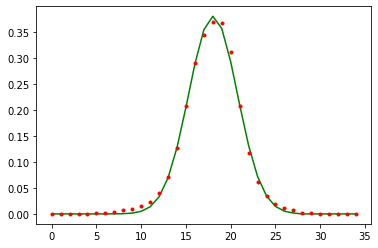

In [8]:
plt.plot(y_pred.detach(),'g', y,'r.')